### Basically collect all the TMD experiments in the different langs

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import glob
import os

import joblib
import pandas as pd
import numpy as np

import tmdglobals

## Alice in Wonderland

In [7]:
def gen_alice_df():
    alice_path = "../Texts_Output/Alice/"
    alice_langs = ['el','en','ru','vi','zh']
    alice_map = {lang: joblib.load(f"./lang_stats/alice_{lang}_mean.pkl") for lang in alice_langs}
    alice_df = pd.DataFrame(alice_map, index=["Alice in Wonderland"])
    return alice_df

## Bible

In [8]:
def gen_bible_df():
    bib_path = "../Texts_Output/Bible/"
    en_mean = joblib.load('./lang_stats/bible_en_mean.pkl')
    ru_mean = joblib.load('./lang_stats/bible_ru_mean.pkl')
    vi_mean = joblib.load('./lang_stats/bible_vi_mean.pkl')
    zh_mean = joblib.load('./lang_stats/bible_zh_mean.pkl')
    bible_map = {
        'en': en_mean,
        'ru': ru_mean,
        'vi': vi_mean,
        'zh': zh_mean,
    }
    bib_df = pd.DataFrame({key: [val] for key, val in bible_map.items()}, index=["Bible"])
    return bib_df

## UDHR

In [9]:
udhr_path = "../Texts_Output/UDHR/"
def load_udhr_df(lang):
    lang_df = pd.read_csv(os.path.join(udhr_path, f"tmd_de_{lang}.csv"))
    return lang_df

In [10]:
def gen_udhr_df(verbose=False):
    vprint = print if verbose else lambda x: None
    # UDHR
    udhr_langs = ['el','en','kk','ru','vi','zh']
    udhr_means = {}
    for cur_lang in udhr_langs:
        vprint(f"{cur_lang}")
        cur_df = load_udhr_df(cur_lang)
        cur_mean = cur_df['tmd'].mean()
        udhr_means[cur_lang] = cur_mean
    #udhr_dfs = {lang: load_udhr_df(lang) for lang in udhr_langs}
    #udhr_means = {lang: udhr_dfs[lang]['tmd'].mean() for lang in udhr_langs}
    combined_df = pd.DataFrame(udhr_means, index=["UDHR"])
    return combined_df

## And the Capital TMDs

In [11]:
cap_df = tmdglobals.gen_cap_df()

In [12]:
cap_df['en'] = np.mean([cap_df['en_aveling'], cap_df['en_fowkes']])

In [13]:
cap_df

,el,en_aveling,en_fowkes,kk,ru,vi,zh,en
Capital V1,1.166985,1.128425,1.121938,1.338835,0.966975,1.139451,1.154967,1.125182


## Now combining everything into one DF

In [14]:
alice_df = gen_alice_df()
bib_df = gen_bible_df()
udhr_df = gen_udhr_df(verbose=True)

el
en
kk
ru
vi
zh


In [15]:
full_df = pd.concat([alice_df, bib_df, cap_df, udhr_df])

In [16]:
full_df.reset_index(inplace=True)

In [17]:
full_df.rename(columns={'index':'title'}, inplace=True)

In [18]:
full_df = full_df[['title','el','en','kk','ru','vi','zh']].copy()

In [19]:
full_df

,title,el,en,kk,ru,vi,zh
0,Alice in Wonderland,1.068903,1.016049,NaN,1.039452,1.136765,1.131740
1,Bible,NaN,0.884110,NaN,0.929112,1.066133,1.069639
2,Capital V1,1.166985,1.125182,1.338835,0.966975,1.139451,1.154967
3,UDHR,0.948562,0.806510,1.367059,0.891848,1.040473,0.951665


In [20]:
melt_df = full_df.melt(id_vars=['title'])

In [21]:
melt_df.rename(columns={'variable':'lang', 'value':'tmd'}, inplace=True)

In [22]:
melt_df['size'] = 10
melt_df

,title,lang,tmd,size
0,Alice in Wonderland,el,1.068903,10
1,Bible,el,NaN,10
2,Capital V1,el,1.166985,10
3,UDHR,el,0.948562,10
4,Alice in Wonderland,en,1.016049,10
5,Bible,en,0.884110,10
6,Capital V1,en,1.125182,10
7,UDHR,en,0.806510,10
8,Alice in Wonderland,kk,NaN,10
9,Bible,kk,NaN,10


In [23]:
melt_df.loc[melt_df['title'] == "Capital V1", "size"] = 15

In [24]:
melt_df

,title,lang,tmd,size
0,Alice in Wonderland,el,1.068903,10
1,Bible,el,NaN,10
2,Capital V1,el,1.166985,15
3,UDHR,el,0.948562,10
4,Alice in Wonderland,en,1.016049,10
5,Bible,en,0.884110,10
6,Capital V1,en,1.125182,15
7,UDHR,en,0.806510,10
8,Alice in Wonderland,kk,NaN,10
9,Bible,kk,NaN,10


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
titles = list(melt_df['title'].unique())
num_titles = len(titles)

In [27]:
num_langs = len(melt_df['lang'].unique())
num_langs

6

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


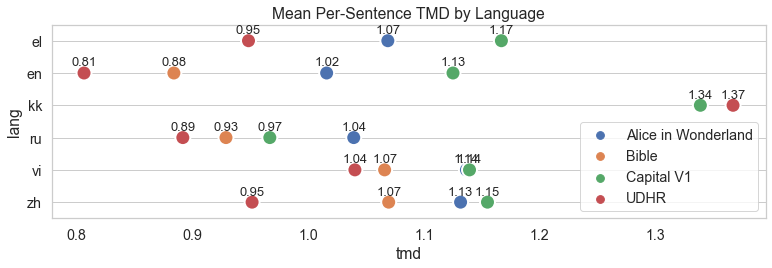

In [35]:
sns.set_theme(style="whitegrid", rc={'figure.figsize':(11,4)}, font_scale=1.3)
#sizes = [10] * (num_titles * num_langs)
dot_plot = sns.stripplot(y="lang", x="tmd", hue="title", data=melt_df,
              jitter=False, dodge=False, orient='h', s=15, linewidth=2,
                         edgecolor="w")
#dot_plot = plt.scatter(y="lang", x="tmd", s="size", data=melt_df)
#dot_plot = sns.relplot(y="lang", x="tmd", hue="title", size="size", data=melt_df,
#                       legend="brief", edgecolor="w")
dot_plot.yaxis.grid(True)
dot_plot.xaxis.grid(False)
dot_plot.set_title("Mean Per-Sentence TMD by Language")
# This removes the title from the legend
handles, labels = dot_plot.get_legend_handles_labels()
dot_plot.legend(handles=handles, labels=labels)
y_map = {'el': 0.0, 'en':1.0, 'kk': 2.0, 'ru': 3.0, 'vi': 4.0, 'zh': 5.0}
xshift = 0.0
#yshift = -0.075
yshift = -0.225

for row_index, row in melt_df.iterrows():
    #print(row)
    cur_x = row['tmd']
    x_str = "{:0.2f}".format(cur_x)
    cur_lang = row['lang']
    #print(cur_lang)
    dot_plot.text(x=cur_x+xshift, y=y_map[cur_lang]+yshift, s=x_str,
                  ha='center', size='small')

#dot_plot.set_sizes([1,2,3,4,5,6,7,8,9,10,11,12])
plt.tight_layout()
#ax_ch = plt.gca().get_children()
#ax_ch[0].set_sizes(500)
#dir(dot_plot)
plt.savefig("tmd_calibration.svg")

In [34]:
os.getcwd()

'C:\\Dropbox\\Translation\\code00_tmd'

## Now plot with ag % gdp

In [36]:
import pandas as pd

In [37]:
ag_df = pd.read_pickle("./gdp_stats/ag_pct.pkl")

In [38]:
ag_df

,year,ag_pct
am,1981,54.739136
de,1991,1.101526
el,1995,7.375806
en,1997,1.336912
es,1970,12.121357
fa,1960,25.900602
hy,2012,17.912682
it,1990,3.182369
ka,1980,23.008850
mn,1981,16.742788


Here we merge in the Soviet-republic-specific dataset

In [39]:
ag_df.loc["az"] = [int(1959), 52.22]
ag_df.loc["kk"] = [int(1959), 56.25]

In [40]:
ag_df.sort_index(inplace=True)

In [41]:
ag_df

,year,ag_pct
am,1981,54.739136
az,1959.0,52.220000
de,1991,1.101526
el,1995,7.375806
en,1997,1.336912
es,1970,12.121357
fa,1960,25.900602
hy,2012,17.912682
it,1990,3.182369
ka,1980,23.008850


### And merge

In [42]:
merged_df = ag_df.merge(cap_df.T, left_index=True, right_index=True, how="left")

In [43]:
merged_df.reset_index(inplace=True)

In [44]:
merged_df.rename(columns={'index':'lang'}, inplace=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='ag_pct', ylabel='Capital V1'>

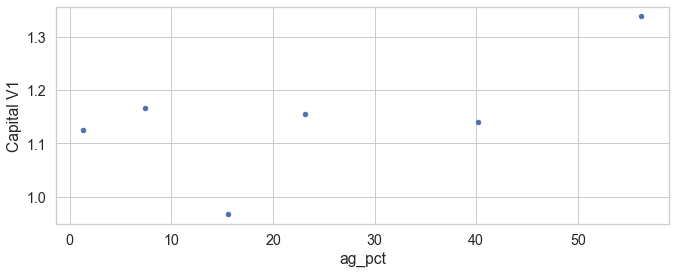

In [45]:
merged_df.plot(kind='scatter', x='ag_pct', y='Capital V1')

In [46]:
import seaborn as sns

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

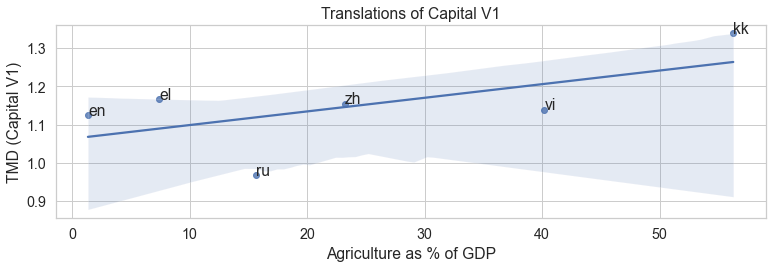

In [76]:
cap_plot = sns.regplot(data=merged_df, x='ag_pct', y='Capital V1')
cap_plot.set_title("Translations of Capital V1")
cap_plot.set_xlabel("Agriculture as % of GDP")
cap_plot.set_ylabel("TMD (Capital V1)")
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(merged_df['ag_pct'], merged_df['Capital V1'], merged_df['lang'], plt.gca())
plt.tight_layout()
plt.savefig("cap_tmd.svg")

# Try UDHR as "control"

In [77]:
merged_udhr_df = ag_df.merge(udhr_df.T, left_index=True, right_index=True, how="left")

In [78]:
merged_udhr_df

,year,ag_pct,UDHR
am,1981,54.739136,NaN
az,1959.0,52.220000,NaN
de,1991,1.101526,NaN
el,1995,7.375806,0.948562
en,1997,1.336912,0.806510
es,1970,12.121357,NaN
fa,1960,25.900602,NaN
hy,2012,17.912682,NaN
it,1990,3.182369,NaN
ka,1980,23.008850,NaN


In [79]:
merged_udhr_df.reset_index(inplace=True)

In [80]:
merged_udhr_df.rename(columns={'index':'lang'}, inplace=True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

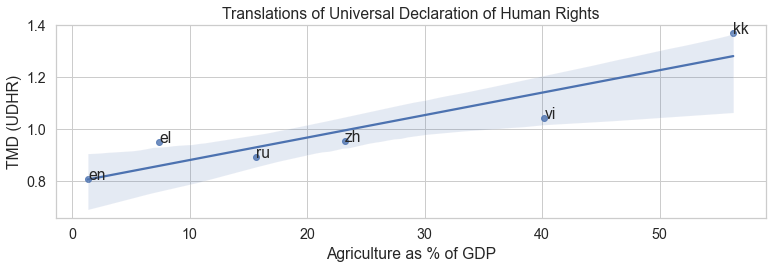

In [81]:
udhr_plot = sns.regplot(data=merged_udhr_df, x='ag_pct', y='UDHR')
udhr_plot.set_title("Translations of Universal Declaration of Human Rights")
udhr_plot.set_xlabel("Agriculture as % of GDP")
udhr_plot.set_ylabel("TMD (UDHR)")
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(merged_udhr_df['ag_pct'], merged_udhr_df['UDHR'], merged_udhr_df['lang'], plt.gca())
plt.tight_layout()
plt.savefig("udhr_tmd.svg")

### Or Alice

In [68]:
merged_alice_df = ag_df.merge(alice_df.T, left_index=True, right_index=True, how="left")

In [69]:
merged_alice_df

,year,ag_pct,Alice in Wonderland
am,1981,54.739136,NaN
az,1959.0,52.220000,NaN
de,1991,1.101526,NaN
el,1995,7.375806,1.068903
en,1997,1.336912,1.016049
es,1970,12.121357,NaN
fa,1960,25.900602,NaN
hy,2012,17.912682,NaN
it,1990,3.182369,NaN
ka,1980,23.008850,NaN


In [70]:
merged_alice_df.reset_index(inplace=True)
merged_alice_df.rename(columns={'index':'lang'}, inplace=True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


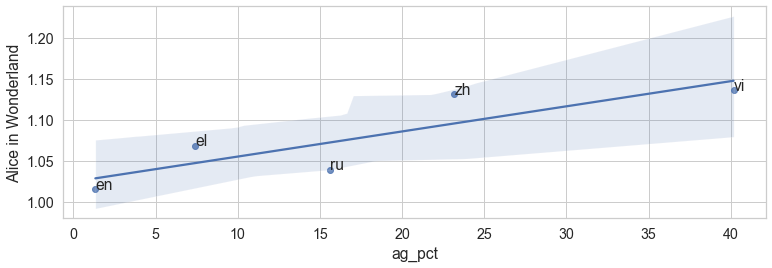

In [72]:
alice_plot = sns.regplot(data=merged_alice_df, x='ag_pct', y='Alice in Wonderland')
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(merged_alice_df['ag_pct'], merged_alice_df['Alice in Wonderland'], merged_alice_df['lang'], plt.gca())
plt.tight_layout()